In [ ]:
import torch
from torch import nn ## nn has all the building blocks of the neural networks
import matplotlib.pyplot as plt
torch.__version__

'2.5.1+cu121'

In [ ]:
# data preparing and loading data can be excel sheet , image , video , audio anything

# 1. converting inputs to the numbers
# 2. Building the model to fit the numbers


In [ ]:
X = torch.arange(0,1,0.02).unsqueeze(dim = 1)
Weight = 1.8
Bias = 0.8

y = Weight*X+Bias

In [ ]:
# First splitting the data into 3

train_split = int(0.8*len(X))
X_train , y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

len(X_train)/len(X) , len(X_test)/len(X) , X_test.dtype

(0.8, 0.2, torch.float32)

In [ ]:
#Visualize the data

def plot_data(train_data = X_train , train_label = y_train , test_data = X_test, test_label = y_test, predictions = None):
  plt.figure(figsize = (10,7))
  plt.scatter(train_data , train_label , c = "b" , s = 4 , label = "Training data" )
  plt.scatter(test_data , test_label , c = "g" , s = 4, label = "Test data ",)
  plt.xlabel(" X values ")
  plt.ylabel(" Y = Weight * X + Bias")
  if predictions is not None :
    plt.scatter(X_test , predictions , c = "r" , s =4, label = "Predictions")
  plt.legend(prop = {"size":14})

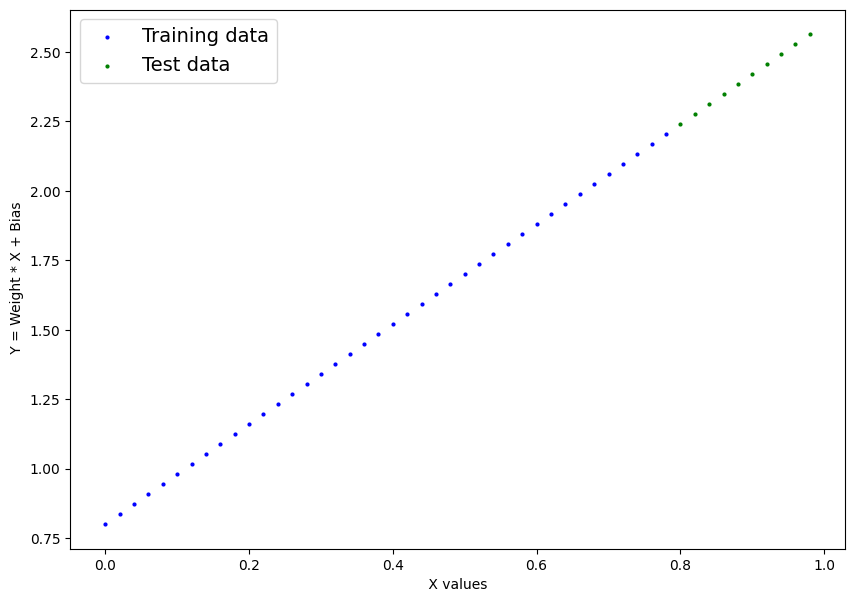

In [ ]:
plot_data()

In [ ]:
# Creating our first model in pytorch

class LinearRegressionModel(nn.Module):
  def __init__(self ):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad = True , dtype= torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad = True , dtype = torch.float))

  def forward(self,x:torch.Tensor) -> torch.Tensor: # Shows x must be a torch.Tensor and should return torch.Tensor
    return self.weights* x + self.bias




* torch.nn - has all the buildings for neural network

* torch.Parameter - what are the parameters theat our model should try and learn often Pytorch layers from torch.nn will set these for us

* torch.nn.Module - the super class of all the Neural network module to override that we must implement forward()

* torch.optim This includes the optimizers

* forward(-) represesnts what happens inside the model

In [ ]:
# Checking the contents of our model
seed = 42
torch.manual_seed(seed)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

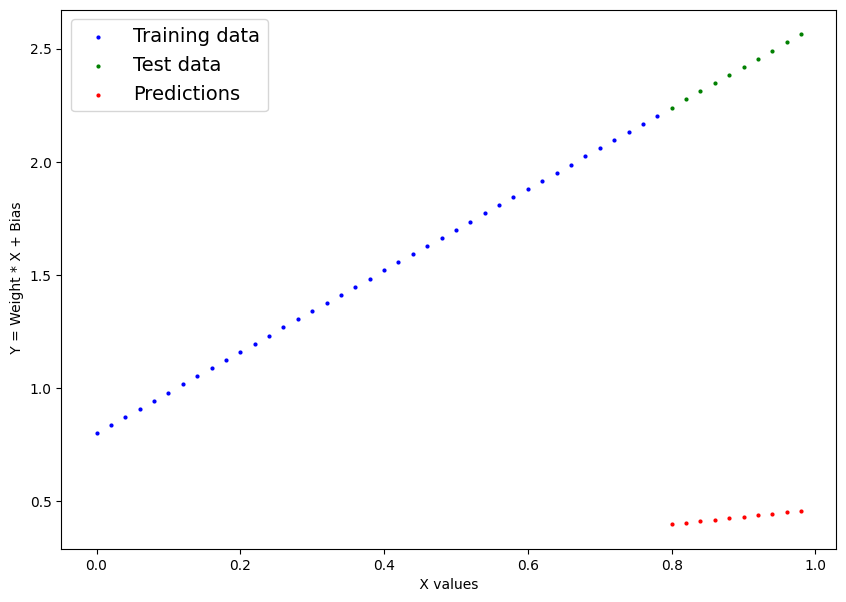

In [ ]:
# Now we have to get these parameters as close as we can to the weights and bias we used to define y

# making predictons even before training

with torch.inference_mode():
  y_pred = model_0(X_test)

# with torch.no_grad():
#   y_preds = model_0(X_test) this also does same

plot_data(predictions = y_pred)

# Inference mode removes the gradient terms and other such things which arent needed for prediction



In [ ]:
# we need optimizers and loss functions
model_0.state_dict()

losslist = []
weightlist = []
biaslist = []



In [ ]:
#  things to consider * loop thru data , * forward pass to make predictions , * optimizer zero grad
#  * Loss backward (backprop)  , * Optimizer step (gradient descent)
# Setup loss and optimizer
loss_fn = nn.L1Loss()

optimizer = torch.optim.Adam(params = model_0.parameters(), lr = 0.01)


epochs = 200 #An epoch is one loop thru data

def train():

  for epoch in range(epochs):

    #Train mode sets all parameters ready to be trained
    model_0.train()

    #Forward prop
    y_pred = model_0(X_train)

    #Calculate the loss
    loss = loss_fn(y_pred,y_train)
    losslist.append(loss)
    if epoch%10==0:
      print(f"The current loss is {loss}")

    #zero the gradients of the optimizer
    optimizer.zero_grad()

    #backprop
    loss.backward()



    #Step the optimizer(gradient descent)
    optimizer.step()
    for name, param in model_0.named_parameters():
            if param.requires_grad:
                if "weight" in name:
                    weightlist.append(param.data.clone())  # Clone to avoid overwriting
                elif "bias" in name:
                    biaslist.append(param.data.clone())  # Clone to avoid overwriting

    #Turn off grad tracking ->
    model_0.eval()


  return loss


In [ ]:
train()

The current loss is 1.2418813705444336
The current loss is 1.1028813123703003
The current loss is 0.9638814926147461
The current loss is 0.8248815536499023
The current loss is 0.6858816146850586
The current loss is 0.5468817949295044
The current loss is 0.40788188576698303
The current loss is 0.2711505889892578
The current loss is 0.16930827498435974
The current loss is 0.11721638590097427
The current loss is 0.10110481083393097
The current loss is 0.09561946243047714
The current loss is 0.08707467466592789
The current loss is 0.0777631402015686
The current loss is 0.0689622312784195
The current loss is 0.059726130217313766
The current loss is 0.05026297643780708
The current loss is 0.040505412966012955
The current loss is 0.0304766446352005
The current loss is 0.02019936963915825


tensor(0.0108, grad_fn=<MeanBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([1.7527])), ('bias', tensor([0.8214]))])

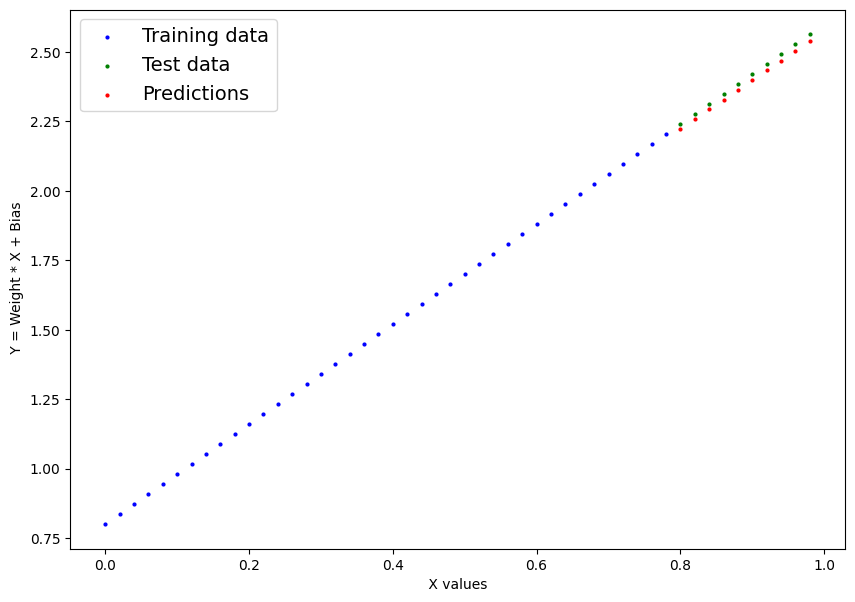

In [ ]:
with torch.inference_mode():
  y_pred = model_0(X_test)

plot_data(predictions = y_pred)

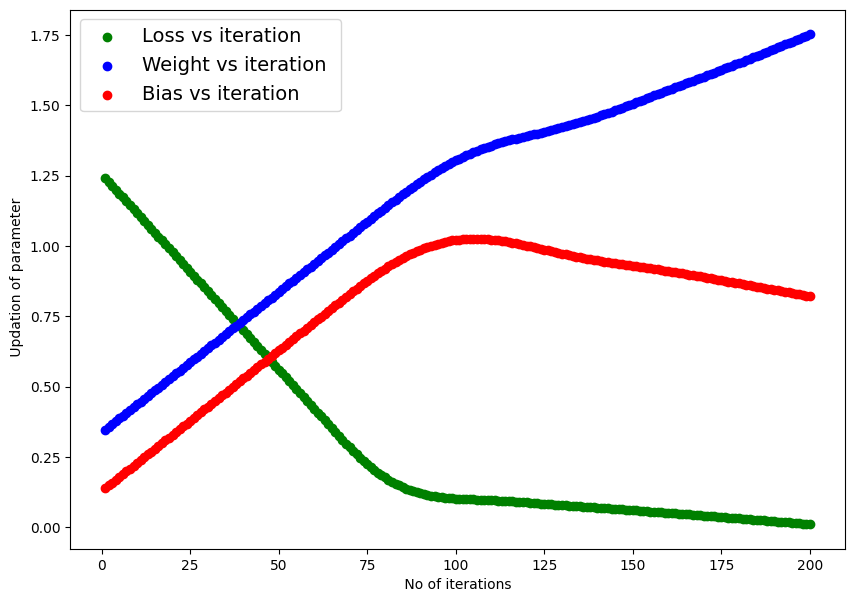

In [ ]:
# This is achieved after running the loop for so long

#lets plot number of iterations versus loss , weight , bias
import numpy as np

with torch.inference_mode():
  plt.figure(figsize  = (10,7))
  plt.scatter(x = np.arange(1,len(losslist)+1,1), y = np.array(losslist) , label = "Loss vs iteration ", c = "g")
  plt.scatter(x = np.arange(1,len(losslist)+1,1), y = np.array(weightlist), label = "Weight vs iteration ", c = "b")
  plt.scatter(x = np.arange(1,len(losslist)+1,1), y = np.array(biaslist) , label = "Bias vs iteration ", c = "r")
  plt.xlabel(" No of iterations ")
  plt.ylabel(" Updation of parameter")
  plt.legend(prop = {"size":14})


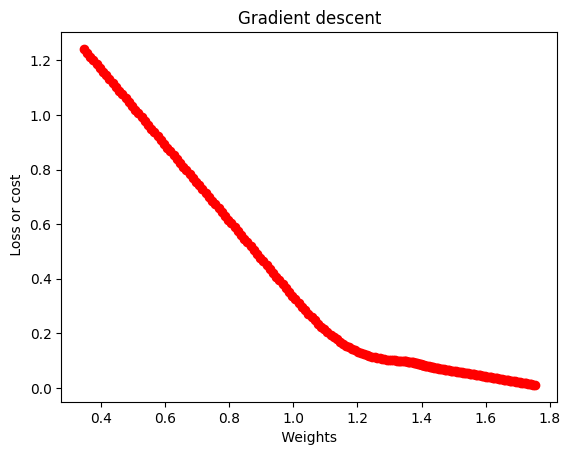

In [ ]:
with torch.inference_mode():
  plt.scatter(x = np.array(weightlist), y = np.array(losslist) , label = "Loss vs weight  ", c = "r")
  plt.xlabel(" Weights ")
  plt.ylabel(" Loss or cost")
  plt.title("Gradient descent")


In [ ]:
y_pred = model_0(X_test)
abs(y_pred - y_test)

tensor([[0.0164],
        [0.0174],
        [0.0183],
        [0.0193],
        [0.0202],
        [0.0212],
        [0.0221],
        [0.0231],
        [0.0240],
        [0.0250]], grad_fn=<AbsBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([1.7527])), ('bias', tensor([0.8214]))])

Saving model in pytorch three methods

* torch.save()

* torch.load() to load

* torch.nn.Module.load_state_dict{}


In [ ]:
from pathlib import Path

#Create a model directory
model_path = Path("models")
model_path.mkdir(parents = True , exist_ok = True)


model_name = "pytorch_linearreg.pth"
model_save_path = model_path / model_name

print(f"Saving to {model_save_path}")

torch.save(obj = model_0.state_dict(), f = model_save_path)

Saving to models/pytorch_linearreg.pth


In [ ]:
model = LinearRegressionModel()
model.load_state_dict(torch.load(f = model_save_path))
model.state_dict()

<ipython-input-84-8fe99753a93d>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f = model_save_path))


OrderedDict([('weights', tensor([1.7527])), ('bias', tensor([0.8214]))])

In [ ]:
model(3.5)

3.5*1.8+0.8 - model(3.5)

tensor([0.1442], grad_fn=<RsubBackward1>)

#Putting it all together

In [ ]:
# Putting it all together


import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.5.1+cu121'

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
#Data
weight = 5.23
bias = 0.78
X = torch.arange(0,1,step=0.001)
y = weight * X + bias
X.shape , y.shape

(torch.Size([1000]), torch.Size([1000]))

In [ ]:
# Splitting the data
train_split = int(0.8*len(X))
X_train , y_train = X[:train_split],y[:train_split]
X_test , y_test = X[train_split:],y[train_split:]
len(X_train)/len(X)

0.8

In [ ]:
 #Building the pytorch linear model

class LinearReg2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,out_features = 1) #One input and one output here
# we dont init the parameters we init the layers which take care of the params

  def forward(self,x:torch.Tensor) -> torch.Tensor :
    return self.linear_layer(x)


torch.manual_seed(42)
model_1 = LinearReg2()
model_1.state_dict()





OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:


# Lists to store losses and parameters
trainloss = []
testloss = []
weightlist = []
biaslist = []

# Loss function
loss_fn = nn.L1Loss()

# Optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

# Number of epochs
epochs = 450

# Training Function
def train(model, epochs, loss_fn, optimizer, X_train, X_test, y_train, y_test):
    for epoch in range(epochs):  # Fix: Loop over epochs inside the function
        model.train()

        # Forward pass
        y_pred = model(X_train)

        # Compute loss
        loss = loss_fn(y_pred, y_train)
        trainloss.append(loss.item())  # Fix: Append scalar instead of tensor

        # Zero gradients
        optimizer.zero_grad()

        # Backpropagation
        loss.backward()

        # Optimizer step
        optimizer.step()

        # Save model weights and biases
        for name, param in model.named_parameters():  # Fix: Use named_parameters()
            if param.requires_grad:
                if "weight" in name:
                    weightlist.append(param.data.clone())
                elif "bias" in name:
                    biaslist.append(param.data.clone())

        # Evaluation Mode
        model.eval()
        with torch.inference_mode():
            test_pred = model(X_test)
            test_loss = loss_fn(test_pred, y_test).item()  # Fix: Compute test loss correctly
            testloss.append(test_loss)

        # Print progress every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Train Loss = {trainloss[-1]}, Test Loss = {testloss[-1]}")

# Call training function
train(model_1, epochs, loss_fn, optimizer, X_train.reshape(-1,1), X_test.reshape(-1,1), y_train, y_test)










Epoch 0: Train Loss = 1.7720359563827515, Test Loss = 3.955583095550537
Epoch 10: Train Loss = 1.6976407766342163, Test Loss = 3.8480565547943115
Epoch 20: Train Loss = 1.6311112642288208, Test Loss = 3.7464561462402344
Epoch 30: Train Loss = 1.5716146230697632, Test Loss = 3.6504602432250977
Epoch 40: Train Loss = 1.5184063911437988, Test Loss = 3.559763193130493
Epoch 50: Train Loss = 1.4708201885223389, Test Loss = 3.474076509475708
Epoch 60: Train Loss = 1.428261637687683, Test Loss = 3.3931264877319336
Epoch 70: Train Loss = 1.390197992324829, Test Loss = 3.3166565895080566
Epoch 80: Train Loss = 1.3561537265777588, Test Loss = 3.24442195892334
Epoch 90: Train Loss = 1.3257031440734863, Test Loss = 3.176192045211792
Epoch 100: Train Loss = 1.2984660863876343, Test Loss = 3.1117494106292725
Epoch 110: Train Loss = 1.2741020917892456, Test Loss = 3.0508875846862793
Epoch 120: Train Loss = 1.2523071765899658, Test Loss = 2.99341082572937
Epoch 130: Train Loss = 1.2328095436096191, Te

In [ ]:
len(weightlist)

len(biaslist)

450

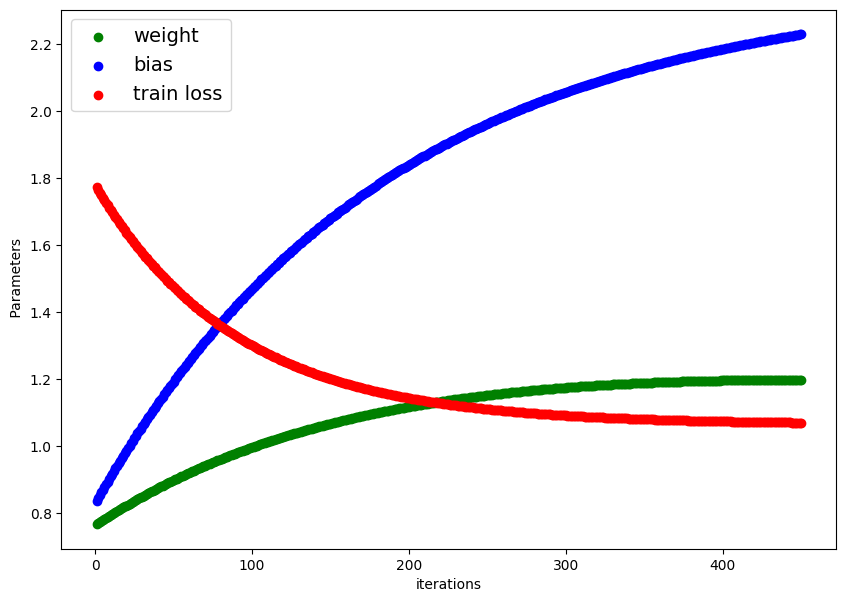

In [ ]:
import numpy as np

plt.figure(figsize=(10,7))
plt.scatter(x = np.arange(1,len(weightlist)+1,1), y = weightlist , c = "g" , label = "weight")
plt.scatter(x = np.arange(1,len(weightlist)+1,1), y = biaslist , c = "b" , label = "bias")
plt.scatter(x = np.arange(1,len(weightlist)+1,1), y = trainloss , c = "r" , label = "train loss")
plt.xlabel("iterations")
plt.ylabel(" Parameters")
plt.legend(prop = {"size":14})

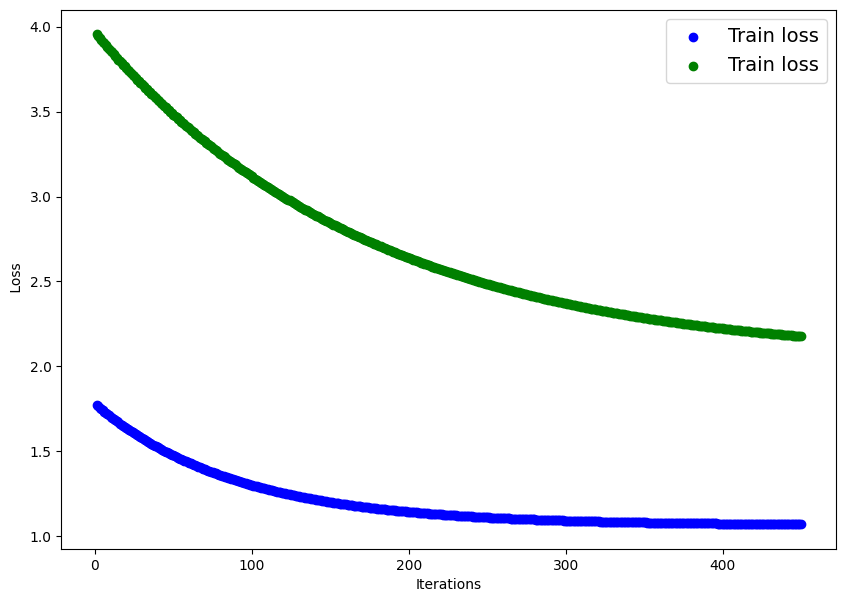

In [ ]:
#trian loss and test loss plot

plt.figure(figsize = (10,7))
plt.scatter(np.arange(1,len(trainloss)+1,1) , trainloss , c = "b" ,label = "Train loss")
plt.scatter(np.arange(1,len(testloss)+1,1),testloss, c = "g" , label = "Train loss")
plt.xlabel("Iterations")
plt.ylabel(" Loss")
plt.legend(prop = {"size":14})

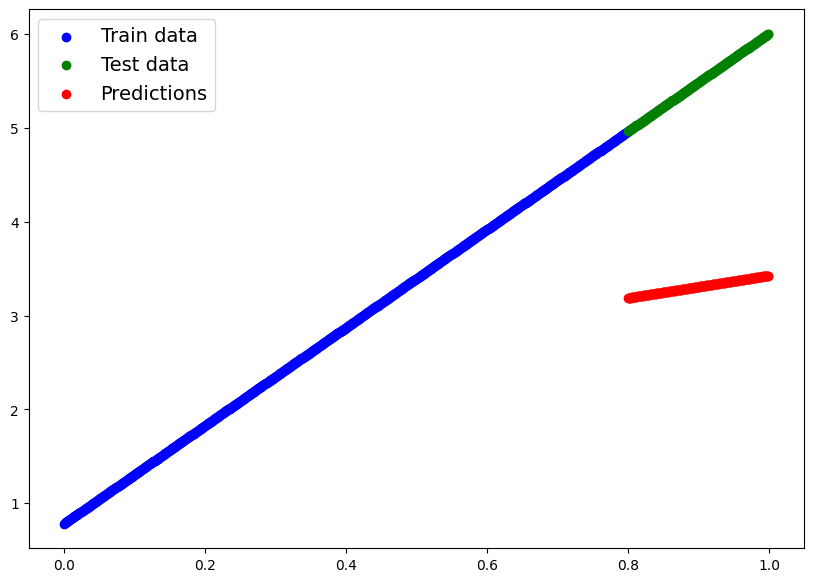

In [ ]:
# lets see the predictins vs actual data

with torch.inference_mode():
  y_pred = model_1(X_test.reshape(200,1))
plt.figure(figsize = (10,7))
plt.scatter(X_train , y_train , c = "b", label = "Train data ")
plt.scatter(X_test,y_test, c= "g" , label = "Test data ")
plt.scatter(X_test,y_pred , c = "r" , label="Predictions")
plt.legend(prop = {"size":14})

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[1.1987]])),
             ('linear_layer.bias', tensor([2.2290]))])

In [ ]:
from pathlib import Path

model_path = Path("models")
model_path.mkdir(parents = True , exist_ok = True)

model_name = "Model_1.pth"
model_save_path = model_path / model_name

torch.save(obj = model_1.state_dict() , f = model_save_path)

In [ ]:
model_2 = LinearReg2()
model_2.load_state_dict(torch.load(f = model_save_path))
model_2.state_dict()

<ipython-input-121-72b44c2f05c7>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_2.load_state_dict(torch.load(f = model_save_path))


OrderedDict([('linear_layer.weight', tensor([[1.1987]])),
             ('linear_layer.bias', tensor([2.2290]))])

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[1.1987]])),
             ('linear_layer.bias', tensor([2.2290]))])

In [ ]:
# Thats all abt the workflow ...........................